In [1]:
%load_ext autoreload

In [2]:
import numpy as np
import seaborn as sns
from fqt import FastQuantileTransformer

sns.set(style='darkgrid')

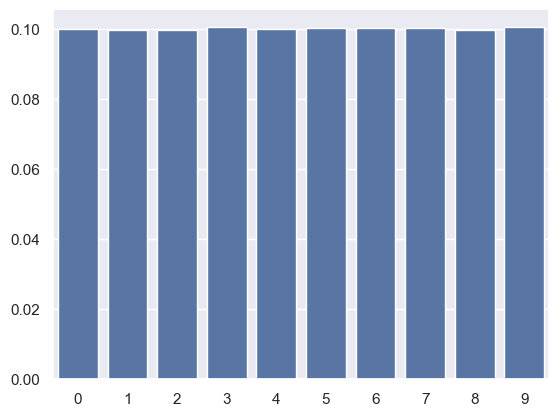

In [3]:
n_samples = 1000000
max_value = 10
X = np.random.randint(0, max_value, size=(n_samples))
X_sorted = np.sort(X)
        
sns.barplot([(X == i).mean() for i in range(max_value)])

y = np.random.random() * 10

<Axes: >

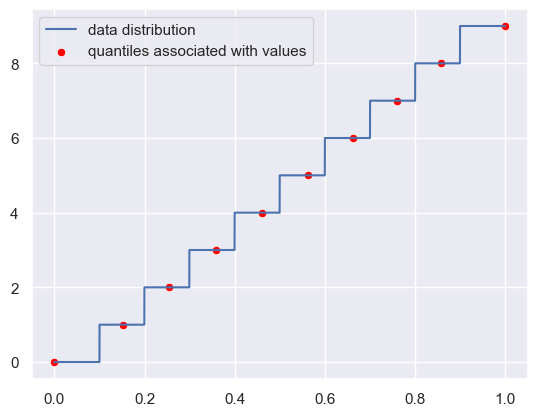

In [4]:
X_transformed = FastQuantileTransformer().fit_transform(X[:, np.newaxis]).reshape(-1)
sns.lineplot(y = X_sorted, x = [i / X.shape[0] for i in range(X.shape[0])], label='data distribution')
sns.scatterplot(x = np.unique(X_transformed), y = range(max_value), color='red', label='quantiles associated with values')

<Axes: >

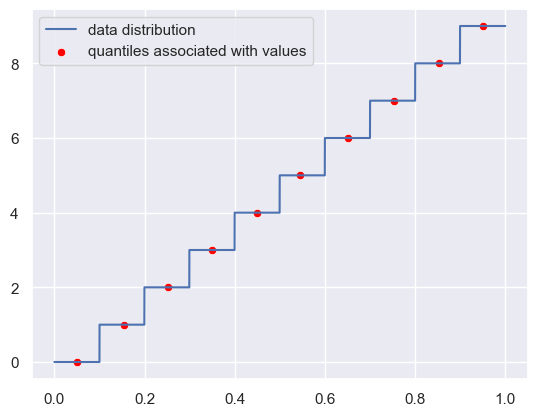

In [5]:
X_transformed_noise = FastQuantileTransformer(noise_distribution='uniform').fit_transform(X[:, np.newaxis]).reshape(-1)
sns.lineplot(y = X_sorted, x = [i / X.shape[0] for i in range(X.shape[0])], label='data distribution')
sns.scatterplot(x = np.unique(X_transformed_noise), y = range(max_value), color='red', label='quantiles associated with values')

In [6]:
import torch
a = torch.tensor([[1, 2], [3, 4]])
FastQuantileTransformer(noise_distribution='uniform', array_api_dispatch=True).fit_transform(a)

/Users/vaaven/FastQuantileTransformer/fqt/transformer.py:210: UserWarning: n_quantiles (1000) is greater than the total number of samples (2). n_quantiles is set to n_samples.
  warnings.warn(


tensor([[0.0000e+00, 2.2891e-06],
        [1.0000e+00, 1.0000e+00]], dtype=torch.float64)